### 로지스틱 회귀분석

In [1]:
# 필요한 패키지 설치

import pandas as pd 
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

##### BMI,PhysicalHealth,MentalHealth,SleepTime가 숫자혀 변수로 있으며 나머지는 명목형 변수다.
##### 모든 칼럼에 결측값은 없는 것으로 확인된다.

In [4]:
# 명목형 변수 더미처리

# 하나의 가변수 범주 제거 옵션 적용
df2 = pd.get_dummies(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=True
                    )

df2.head()

#로지스틱 회귀분석을 하기 위해 명목형 변수를 0과1의 가변수 형태로 변환해야 한다.
# get_dummies() 함수에 drop_first=True 옵션을 적용하여 마지막 항목은 제거되도록 변수 가공을 해준다.

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,False,True,False,False,False,False,...,True,False,True,False,False,False,True,True,False,True
1,20.34,0.0,0.0,7.0,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,26.58,20.0,30.0,8.0,False,True,False,False,False,True,...,True,False,True,True,False,False,False,True,False,False
3,24.21,0.0,0.0,6.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,23.71,28.0,0.0,8.0,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False


In [5]:
# RobustScaler 적용

# 숫자형 변수 분리
df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

# 숫자형 변수 RobustScaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

# 컬럼명 결합
df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)

# 숫자형 테이블과 더미화 문자형 테이블 결합
df3 = pd.concat([df_num2,df_nom],axis=1)

df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,False,True,False,False,False,False,...,True,False,True,False,False,False,True,True,False,True
1,-0.947226,0.0,0.0,0.0,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,-0.102842,10.0,10.0,0.5,False,True,False,False,False,True,...,True,False,True,True,False,False,False,True,False,False
3,-0.423545,0.0,0.0,-0.5,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,-0.491204,14.0,0.0,0.5,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False


#### 로지스틱 회귀분석은 정규화 과정을 통해 과적합을 방지하는 프로세스가 있으므로 스케일을 조정해줘야 한다.
#### 예시에는 우선 명목형 변수와 숫자형 변수를 분리한 다음 숫자형 변수만 있는 데이터셋에 RobustSclaler() 함수를 적용하여 스케일링을 했다.

In [6]:
# 독립변수와 종속변수 분리하여 생성
X = df3.drop(['HeartDisease_Yes'],axis=1)
y = df3[['HeartDisease_Yes']]

# 학습셋과 테스트셋 분리하여 생성(7.5:2.5)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

#데이터 전처리가 완료된 다음에는 train_test_split 함수로 학습셋과 예측셋으로 분리한다.
#예시에선 3:1 비율로 분리했다.

train data 개수:  239846
test data 개수:  79949


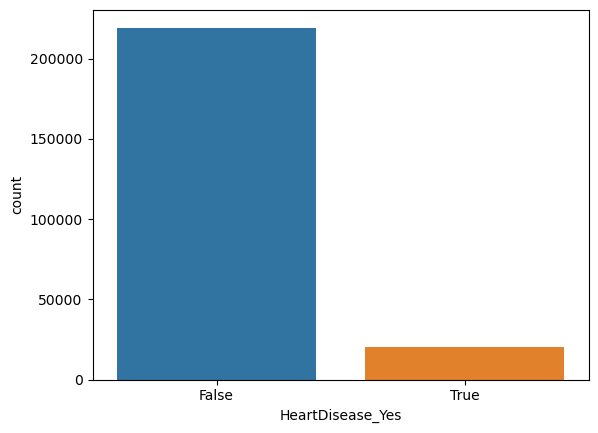

In [7]:
# HeartDisease_Yes 컬럼 클래스 분포 시각화
sns.countplot(x="HeartDisease_Yes", data=y_train)

plt.show()

#학습셋 종속변수의 0과1 클래스 비율을 확인한다.
# 1값이 10%미만으로 클래스 불균형이 심한 상황이다.
#따라서 언더샘플링이나 오버샘플링을 적용하여 클래스 균형을 맞춰 줘야한다.

In [8]:
# 임시 변수명 적용

X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']


X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()

#기존 변수명은 언더샘플링이나 오버샘플링 적용 시 오류가 발생하기 때문에 임시적으로 변수명을 x1~x37로 변경해준다.@

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
163572,-0.202977,0.0,0.0,-0.5,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
150901,1.476319,0.0,0.0,0.5,True,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
164527,-0.248985,15.0,10.0,-2.0,True,False,False,True,True,False,...,False,False,True,False,False,True,False,False,False,False
260971,0.805142,0.0,0.0,0.0,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
262287,0.612991,5.0,0.0,0.0,False,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,False


In [9]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train_re,y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train_re.shape, y_train_re.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train_re['y1']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['y1']).value_counts())

#클래스 불균형 문제를 해결하기 위해 언더샘플링을 적용한다. 적용전에는 219,328:20,518비율이었으나, 언더샘플링 적용후 20158:20158로 동일한 비율로 변경됐다.

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (239846, 37) (239846, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (41036, 37) (41036, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 y1
False    219328
True      20518
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 y1
False    20518
True     20518
Name: count, dtype: int64


In [10]:
# 컬럼명 복구
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

#언더샘플링을 마치고 다시 기존의 컬럼며으로 복구한다.

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
69819,-0.572395,0.0,1.666667,0.5,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
248332,2.365359,6.0,0.333333,-0.5,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
31381,-0.964817,0.0,2.666667,0.5,False,False,False,False,True,False,...,False,False,True,False,False,False,True,True,False,False
152264,-1.246279,0.0,0.000000,-0.5,True,False,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
90674,0.668471,15.0,0.000000,0.5,True,False,False,False,True,False,...,True,False,True,True,False,False,False,False,False,False


In [11]:
# 학습셋 모델 학습

model = LogisticRegression()
model.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도:', model.score(X_train_under, y_train_under))

#모든 데이터 전처리가 끝난 후에는 학습셋에 로지스틱 회귀 함수를 적용해 주어 모델을 생성한다.
#먼저 학습셋의 모델 정확도를 산출했다.
#아웃풋 결과를 통해 약 76%의 정확도를 가진 모델이 생성된 것을 알 수 있다.

C:\Users\qorud\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습셋 모델 정확도: 0.7645482015791013


C:\Users\qorud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# 테스트셋 모델 적합

print('테스트셋 모델 정확도:', model.score(X_test, y_test))

#학습셋으로 생성한 로지스틱 회귀 모델을 사전에 분리해 놓은 테스트셋에 적합 시킨다.
#이를 통해 모델 학습이 적절하게 이루어졌는지 확인한다.
#약 75%의 정확도로 학습셋과 거의 차이가 없기 때문에 과적합이나 과소적합이 없을 것으로 판단된다.

테스트셋 모델 정확도: 0.7501156987579582


In [13]:
# 계수값 확인

print(model.coef_)

#다음으로 각 독립변수의 영향력을 확인하기 위해 model.coef_함수로 계숫값을 산출한다. 각 숫자의 크기와 음수인지 양수인지를 통해 각 독립변수가 종속변수에 어떠한 영향을 미치는지 파악할 수 있다.
#하지만 계숫값은 직관적이지 않기 때문에 참고용으로만 확인한다.

[[ 7.97264518e-02  1.19029569e-02  2.93643138e-02 -5.45980975e-02
   4.06142331e-01 -2.46665175e-01  1.28143899e+00  2.00085989e-01
   7.60087250e-01 -5.75892542e-02  3.97272657e-01  4.15852344e-01
   7.87982507e-01  1.07629928e+00  1.52849380e+00  1.76618931e+00
   2.04611570e+00  2.33250207e+00  2.68476608e+00  2.84142245e+00
   3.20271139e+00 -5.28892032e-01 -2.43566135e-01 -1.83592743e-01
  -9.67980522e-02 -5.99335309e-02  2.81278565e-01  4.80222922e-01
   4.37402569e-01 -1.95070103e-03  1.49934012e+00  1.02764806e+00
   1.81076133e+00  4.45415805e-01  2.94562018e-01  6.17165930e-01
   1.41472691e-01]]


In [19]:
# 다른 로지스틱 모델로 학습
model2 = sm.Logit(y_train_under, X_train_under)
results = model2.fit() 

results.summary()
#아래 P-value를 보았을 떄 모든 변수가 유의미한 것을 알 수있다.

ValueError: Index data must be 1-dimensional

In [ ]:
# 오즈비 확인

np.exp(results.params)

#마지막으로 종속변수인 심장병 여부 확률에 어떤 영향을 미치는지 확인하기 위해 오즈비를 산출한다
#ㅇ는 앞의 이론 부분에서 다뤘듯이 해당 독립변수가 1일 때 심장병 발생 확률이 몇 배 더 큰지를 나타낸다.